#### IMPORTS



In [4]:
import numpy as np
import matplotlib.pyplot as plt

from ql_core import Oriented2DGrid, QLAgent, train
from utils import plot_rewards, plot_epsilon_history, visualize_policy

#### INITIALIZE CLASSES & START TRAINING

In [5]:
# Grid Configuration
X_SIZE = 5
Y_SIZE = 5
START = (0, 0, 0)
GOAL = (X_SIZE - 1, Y_SIZE - 1, 0)

# Obstacles (example)
obs_grid = np.load("grids/grid_5x5.npy")

# Initialize Environment
environment = Oriented2DGrid(
    grid_size= (X_SIZE, Y_SIZE),
    start= START,
    goal= GOAL,
    actions_type= "diff",
    reward_gains= {"goal": 100.0, "invalid": 100.0, "move": 1, "turn": 6, "nearby_obs": 10},
    obs_grid= obs_grid,
    random_start_percentage= 0,
)

# Initialize Agent
agent = QLAgent(
    state_shape= environment.state_shape,
    n_actions= environment.n_actions,
    learning_rate= 0.2,
    discount_factor= 0.9,
)

# Train Agent
n_episodes = 10000

print("Starting training...")
data_backup = train(
    agent= agent,
    environment= environment,
    n_episodes= n_episodes,
    verbose= True,
    verbose_interval= n_episodes // 10,
    )
print("Training completed.")

Starting training...
Episode 1000/10000 | Epsilon: 0.892
Episode 2000/10000 | Epsilon: 0.795
Episode 3000/10000 | Epsilon: 0.709
Episode 4000/10000 | Epsilon: 0.632
Episode 5000/10000 | Epsilon: 0.564
Episode 6000/10000 | Epsilon: 0.503
Episode 7000/10000 | Epsilon: 0.449
Episode 8000/10000 | Epsilon: 0.400
Episode 9000/10000 | Epsilon: 0.400
Episode 10000/10000 | Epsilon: 0.400
Training completed.


#### GRAPHICS

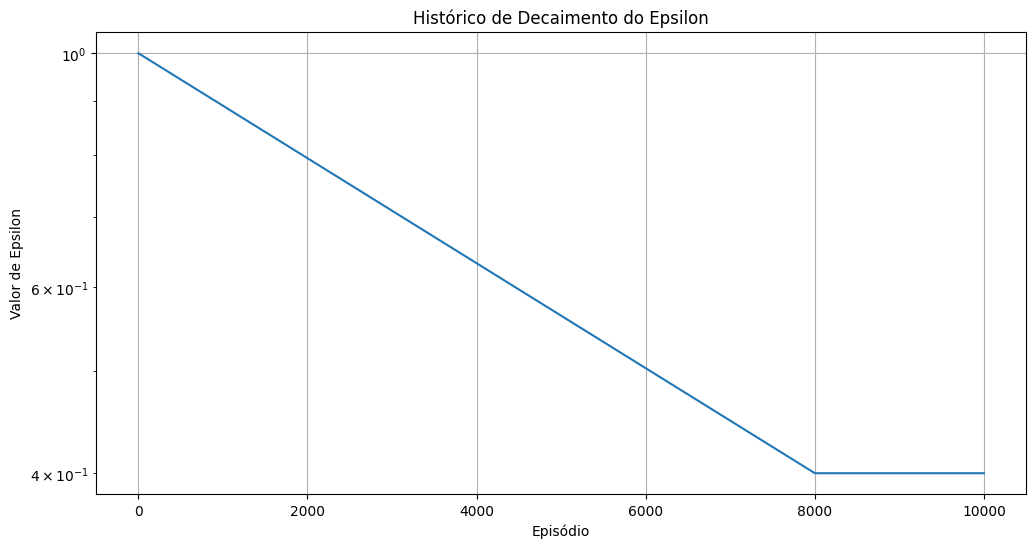

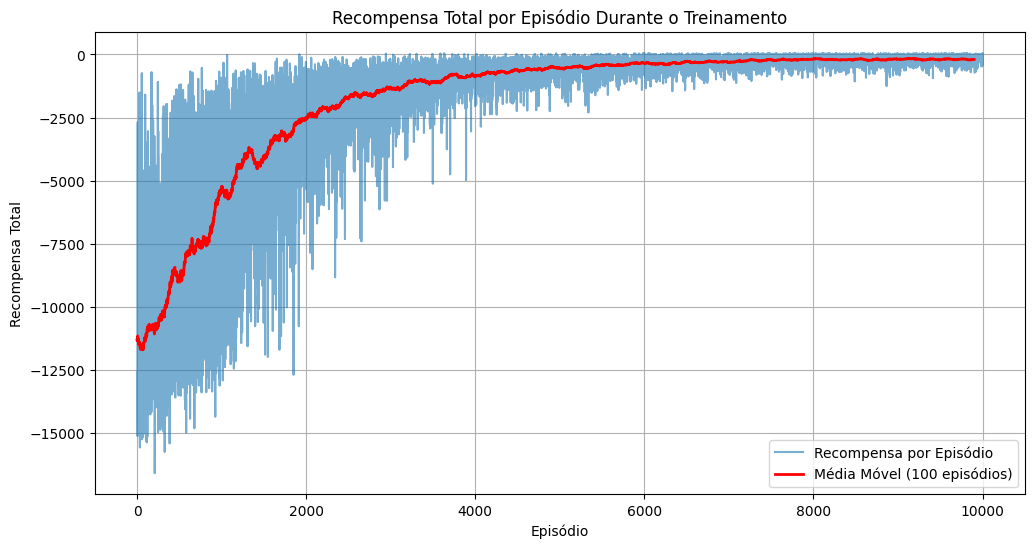

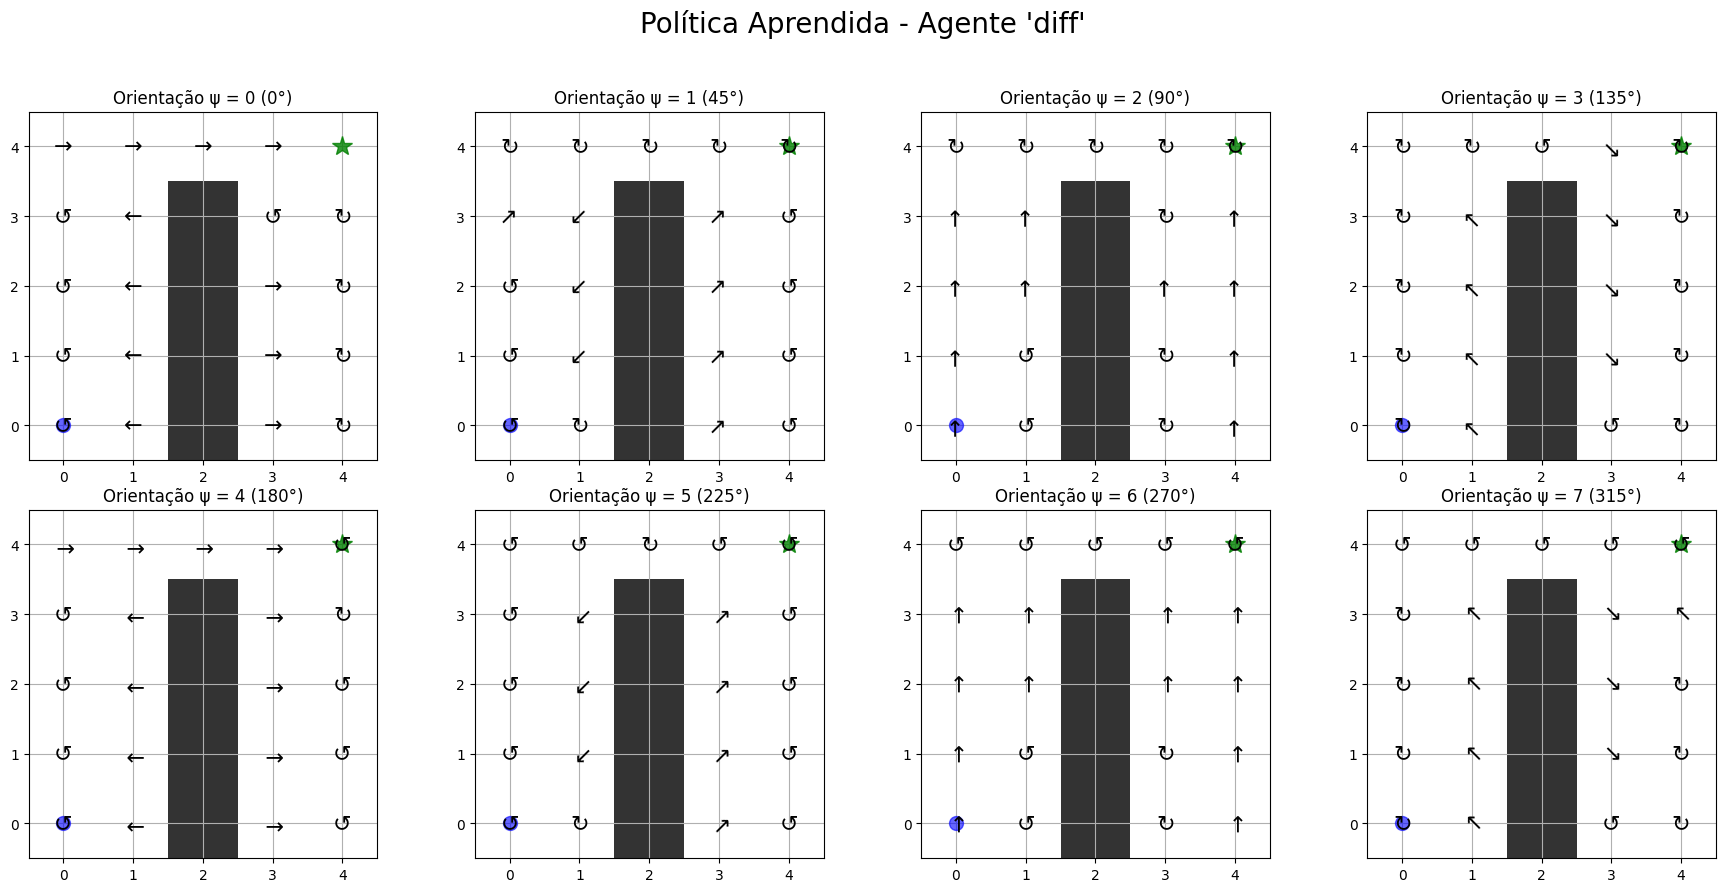

In [6]:
plot_epsilon_history(data_backup["epsilon_history"])
plot_rewards(data_backup["rewards_history"])
visualize_policy(agent, environment)